In [7]:
%run ./01-readData.ipynb

In [8]:
# Plot features
def create_ani(var, colormap, shapefile_path, norm = False, boundaries = 0 ):
    fig = plt.figure(figsize=(9,11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([68.04999,97.95001, 5.5, 37.45], ccrs.PlateCarree())
    cmap = colors.ListedColormap(colormap)
    ncolors = len(colormap)
    color_array = plt.get_cmap(cmap)(range(ncolors))
    color_array[0:,-1] = np.linspace(0.6,1.0,ncolors)

    map_object = LinearSegmentedColormap.from_list(name='cmap_alpha', colors=color_array)
    plt.register_cmap(cmap=map_object)


    cbar_ax = fig.add_axes([0.127, 0.06, 0.77, 0.03]) #colorbar axes position

    #Overlaying of administrative boundries

    filename = r'{}'.format(shapefile_path)
    shape_feature = ShapelyFeature(Reader(filename).geometries(),ccrs.PlateCarree(),
                                  linewidth = 1.5, facecolor = 'none',
                                  edgecolor = 'black')
    ax.add_feature(shape_feature)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND,edgecolor='black')
    if norm:
        normSet = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
        
        im = xr.plot.imshow(dat['{}'.format(var)].isel(time=11), 
                            ax = fig.add_subplot(projection= None),
                            norm=normSet, cmap='cmap_alpha',
                            add_labels = False, add_colorbar =False)
        
    else: 
        im = xr.plot.imshow(dat['{}'.format(var)].isel(time=52), 
                    ax = fig.add_subplot(projection= None),
                    cmap='cmap_alpha',
                    add_labels = False, add_colorbar =False)

    ax.set_aspect('auto') # aspect ratio for the plot

    #Add colorbar specs
    cb=plt.colorbar(im, cax=cbar_ax, orientation="horizontal", pad = -0.169)
    cb.set_label(r'Streamflow ($m^{3}$/$s$)', labelpad=-60, y =0.5,fontdict = {'weight': 'bold', 'size':12}) #To-Do
    plt.grid(True)
    plt.axis('off')
    plt.title('\nIndia Water Model\n'+ str(dat['time'][11].values)[2:13]+'\n',loc='left',fontdict={'weight': 'bold','size':22})

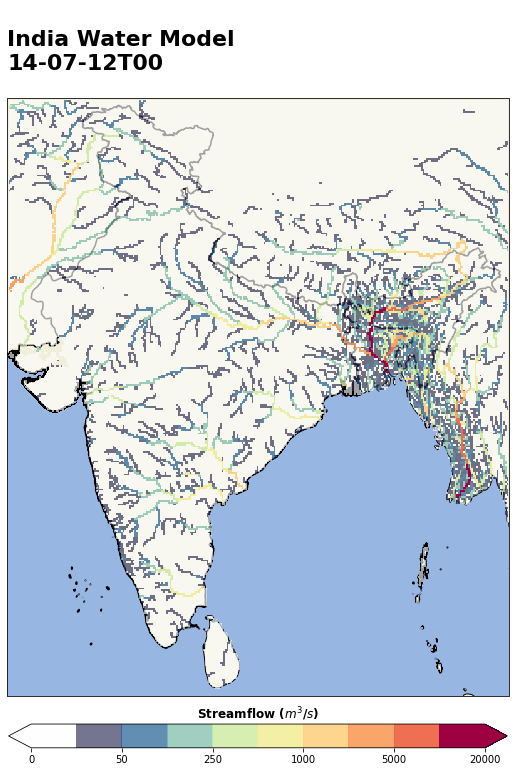

In [9]:
#Streamflow

var = 'Streamflow_tavg'
colormap = ['#f7f7f7','#ffffff','#000033','#3288bd','#abdda4','#e6f598','#fee08b','#fdae61','#f46d43','#d53e4f','#9e0142']
boundaries = [0,10,50,100,250,500,1000,2500,5000,10000,20000]
shapefile_path = './shapefiles/India_Boundary.shp'
create_ani(var,colormap, shapefile_path, True, boundaries)


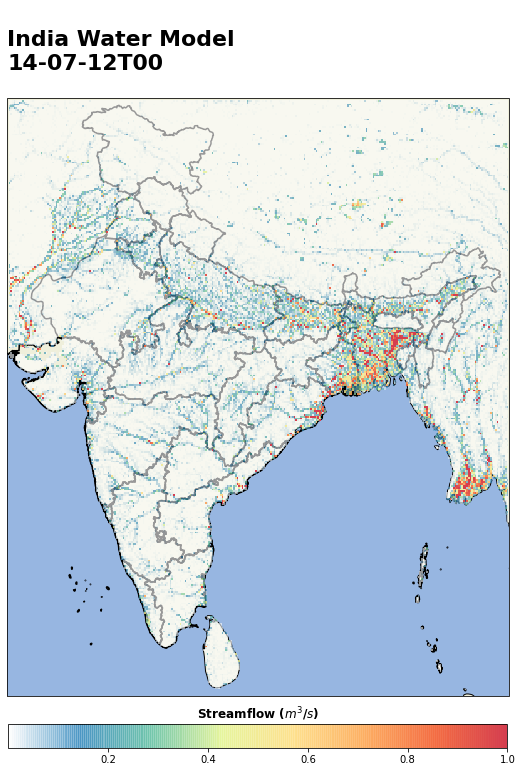

In [10]:
#Flooded Fraction 

var = 'FloodedFrac_tavg'
colormap = ['#FFFFFF','#3288bd','#66c2a5','#e6f598','#fee08b','#fdae61','#f46d43','#d53e4f']
shapefile_path = './shapefiles/India-States.shp'
create_ani(var, colormap, shapefile_path)

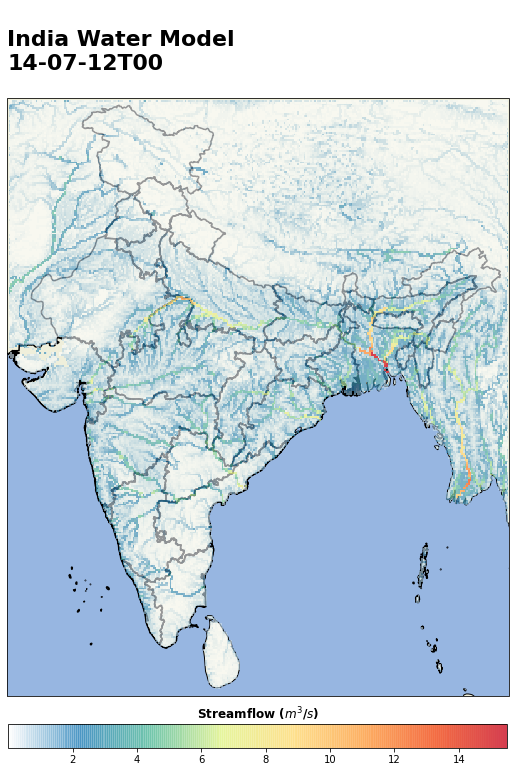

In [11]:
#River Depth

var = 'RiverDepth_tavg'
colormap = ['#FFFFFF','#3288bd','#66c2a5','#e6f598','#fee08b','#fdae61','#f46d43','#d53e4f']
shapefile_path = './shapefiles/India-States.shp'
create_ani(var, colormap, shapefile_path)

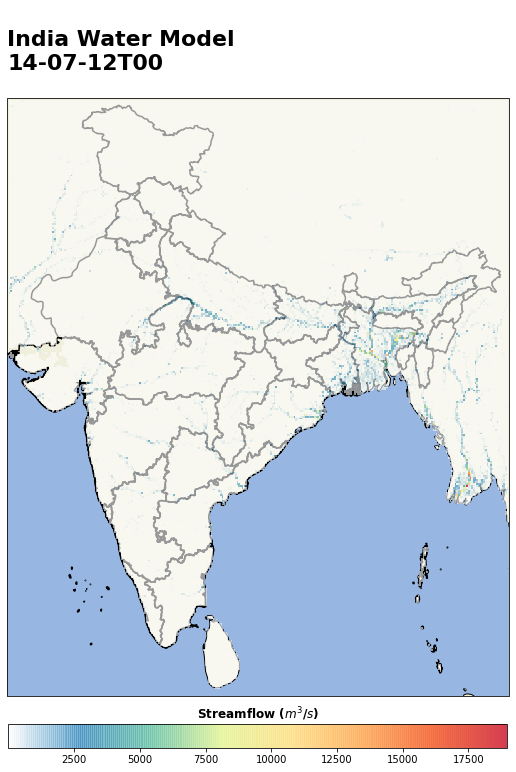

In [12]:
#SWS

var = 'SWS_tavg'
colormap = ['#FFFFFF','#3288bd','#66c2a5','#e6f598','#fee08b','#fdae61','#f46d43','#d53e4f']
shapefile_path = './shapefiles/India-States.shp'
create_ani(var, colormap, shapefile_path)